In [1]:
import pandas as pd
import numpy as np

In [2]:
pca_time = pd.read_csv("data/pcatimes.csv") 
ec_time = pd.read_csv("data/ectimes.csv")

In [3]:
ec_time.isna().sum().sum()

3

In [4]:
pca_time.isna().sum().sum()

7

In [3]:
ec_time = ec_time.fillna(0)
pca_time = pca_time.fillna(0)

In [80]:
ec_train = ec_time.sample(frac = 0.8)
ec_test = ec_time.drop(ec_train.index)

ec_train_x = ec_train.drop(["Strain"], axis=1)
ec_train_y = ec_train["Strain"]

ec_test_x = ec_test.drop(["Strain"], axis=1)
ec_test_y = ec_test["Strain"]

In [140]:
pca_train = pca_time.sample(frac = 0.8)
pca_test = pca_time.drop(pca_train.index)

pca_train_x = pca_train.drop(["Strain"], axis=1)
pca_train_y = pca_train["Strain"]

pca_test_x = pca_test.drop(["Strain"], axis=1)
pca_test_y = pca_test["Strain"]

### AutoML baseline for EC

In [9]:
''''
from supervised.automl import AutoML
automl = AutoML(total_time_limit=5*60)
automl.fit(ec_train_x, ec_train_y)

2021-10-27 15:33:52,025 supervised.preprocessing.eda ERROR There was an issue when running EDA. could not convert string to float: 'EC_B'


AutoML directory: AutoML_8
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 0.690058 trained in 0.27 seconds
2_DecisionTree logloss 0.086644 trained in 7.99 seconds
3_Linear logloss 0.551518 trained in 2.08 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost logloss 0.102722 trained in 111.44 seconds
5_Default_NeuralNetwork logloss 0.405663 trained in 0.61 seconds
6_Default_RandomForest logloss 0.362119 trained in 4.4 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.086644 trained in 0.46 seconds
AutoML fit time: 136.32 seconds
AutoML best model: 2_DecisionTree


AutoML(total_time_limit=300)

In [10]:
#y_predicted = automl.predict(ec_test_x)

In [11]:
'''
predicted_strain = pd.DataFrame(y_predicted, columns=["PredictedStrain"])
print(pd.DataFrame({"Predicted": predicted_strain["PredictedStrain"], "Target": np.array(ec_test_y)}))

   Predicted Target
0       EC_A   EC_A
1       EC_B   EC_B
2       EC_B   EC_B
3       EC_B   EC_B
4       EC_B   EC_B
5       EC_B   EC_B
6       EC_B   EC_B
7       EC_B   EC_A
8       EC_A   EC_A
9       EC_A   EC_A
10      EC_A   EC_A
11      EC_B   EC_B
12      EC_B   EC_B
13      EC_B   EC_B
14      EC_B   EC_B
15      EC_B   EC_A
16      EC_A   EC_A
17      EC_B   EC_B
18      EC_B   EC_B
19      EC_A   EC_A
20      EC_A   EC_A
21      EC_B   EC_B
22      EC_B   EC_B
23      EC_B   EC_B


In [25]:
# Accuracy = no correct answers / number of targets
accuracy = 22/24
print(accuracy*100)

91.66666666666666


Baseline for EC is 83.3%

Baseline for PC

In [13]:
'''
from supervised.automl import AutoML
automl = AutoML(total_time_limit=5*60)
automl.fit(pca_train_x, pca_train_y)

2021-10-27 15:36:08,418 supervised.preprocessing.eda ERROR There was an issue when running EDA. could not convert string to float: 'PA.A'


AutoML directory: AutoML_9
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 0.693533 trained in 0.65 seconds
2_DecisionTree logloss 0.318401 trained in 3.32 seconds
3_Linear logloss 0.862773 trained in 2.28 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost logloss 0.228946 trained in 77.63 seconds
5_Default_NeuralNetwork logloss 0.812959 trained in 0.71 seconds
6_Default_RandomForest logloss 0.477472 trained in 4.26 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.222414 trained in 0.32 seconds
AutoML fit time: 97.94 seconds
AutoML best model: Ensemble


AutoML(total_time_limit=300)

In [14]:
#y_predicted = automl.predict(pca_test_x)

In [15]:
'''
predicted_strain = pd.DataFrame(y_predicted, columns=["PredictedStrain"])
print(pd.DataFrame({"Predicted": predicted_strain["PredictedStrain"], "Target": np.array(pca_test_y)}))

   Predicted Target
0       PA.B   PA.B
1       PA.B   PA.B
2       PA.A   PA.A
3       PA.A   PA.A
4       PA.A   PA.A
5       PA.B   PA.B
6       PA.B   PA.B
7       PA.A   PA.A
8       PA.A   PA.A
9       PA.B   PA.B
10      PA.B   PA.B
11      PA.A   PA.B
12      PA.A   PA.A
13      PA.A   PA.A
14      PA.A   PA.A
15      PA.A   PA.A
16      PA.B   PA.B
17      PA.B   PA.A
18      PA.A   PA.A
19      PA.B   PA.A
20      PA.B   PA.B
21      PA.B   PA.B
22      PA.A   PA.A
23      PA.B   PA.B


In [26]:
accuracy = 21/24
print(accuracy*100)

87.5


Same Results for PA Baseline

## New EC scores

In [17]:
'''
from supervised.automl import AutoML
automl = AutoML(algorithms=["Decision Tree", "Linear", "Random Forest"],
                total_time_limit=5*60)
automl.fit(ec_train_x, ec_train_y)

2021-10-27 15:37:46,450 supervised.preprocessing.eda ERROR There was an issue when running EDA. could not convert string to float: 'EC_B'


AutoML directory: AutoML_10
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_DecisionTree logloss 0.086644 trained in 3.32 seconds
2_Linear logloss 0.551518 trained in 2.37 seconds
* Step default_algorithms will try to check up to 1 model
3_Default_RandomForest logloss 0.391908 trained in 4.35 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.086644 trained in 0.21 seconds
AutoML fit time: 15.37 seconds
AutoML best model: 1_DecisionTree


AutoML(algorithms=['Decision Tree', 'Linear', 'Random Forest'],
       total_time_limit=300)

In [18]:
#y_predicted = automl.predict(ec_test_x)

In [19]:
'''
predicted_strain = pd.DataFrame(y_predicted, columns=["PredictedStrain"])
print(pd.DataFrame({"Predicted": predicted_strain["PredictedStrain"], "Target": np.array(ec_test_y)}))

   Predicted Target
0       EC_A   EC_A
1       EC_B   EC_B
2       EC_B   EC_B
3       EC_B   EC_B
4       EC_B   EC_B
5       EC_B   EC_B
6       EC_B   EC_B
7       EC_B   EC_A
8       EC_A   EC_A
9       EC_A   EC_A
10      EC_A   EC_A
11      EC_B   EC_B
12      EC_B   EC_B
13      EC_B   EC_B
14      EC_B   EC_B
15      EC_B   EC_A
16      EC_A   EC_A
17      EC_B   EC_B
18      EC_B   EC_B
19      EC_A   EC_A
20      EC_A   EC_A
21      EC_B   EC_B
22      EC_B   EC_B
23      EC_B   EC_B


In [27]:
accuracy = 22/24
print(accuracy*100)

91.66666666666666


91.6% accuracy

## New PC scores

In [29]:
'''
from supervised.automl import AutoML
automl = AutoML(algorithms=["Decision Tree", "Linear", "Random Forest"],
                total_time_limit=5*60)
automl.fit(pca_train_x, pca_train_y)

2021-10-27 15:43:44,179 supervised.preprocessing.eda ERROR There was an issue when running EDA. could not convert string to float: 'PA.B'


AutoML directory: AutoML_12
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_DecisionTree logloss 0.407512 trained in 9.64 seconds
2_Linear logloss 0.559297 trained in 2.64 seconds
* Step default_algorithms will try to check up to 1 model
3_Default_RandomForest logloss 0.524965 trained in 4.67 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.407512 trained in 0.18 seconds
AutoML fit time: 22.68 seconds
AutoML best model: 1_DecisionTree


AutoML(algorithms=['Decision Tree', 'Linear', 'Random Forest'],
       total_time_limit=300)

In [30]:
#y_predicted = automl.predict(pca_test_x)

In [31]:
'''
predicted_strain = pd.DataFrame(y_predicted, columns=["PredictedStrain"])
print(pd.DataFrame({"Predicted": predicted_strain["PredictedStrain"], "Target": np.array(pca_test_y)}))

   Predicted Target
0       PA.B   PA.B
1       PA.A   PA.A
2       PA.B   PA.B
3       PA.B   PA.B
4       PA.B   PA.B
5       PA.B   PA.A
6       PA.A   PA.A
7       PA.A   PA.A
8       PA.B   PA.A
9       PA.B   PA.B
10      PA.B   PA.B
11      PA.B   PA.B
12      PA.B   PA.B
13      PA.B   PA.B
14      PA.B   PA.B
15      PA.B   PA.A
16      PA.B   PA.A
17      PA.A   PA.A
18      PA.A   PA.A
19      PA.B   PA.B
20      PA.B   PA.B
21      PA.A   PA.A
22      PA.B   PA.B
23      PA.B   PA.B


In [32]:
accuracy = 20/24
print(accuracy*100)

83.33333333333334


### TPOT Classifier: AutoML

In [4]:
from tpot import TPOTClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [9]:
ec_time["Strain"] = ec_time["Strain"].replace(["EC_A", "EC_B"], [1,2])
pca_time["Strain"] = pca_time["Strain"].replace(["PA_A", "PA_B"], [1,2])

### TPOT for EC

In [10]:
ec_train = ec_time.sample(frac = 0.8)
ec_test = ec_time.drop(ec_train.index)

ec_train_x = ec_train.drop(["Strain"], axis=1)
ec_train_y = ec_train["Strain"]

ec_test_x = ec_test.drop(["Strain"], axis=1)
ec_test_y = ec_test["Strain"]

In [12]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
model.fit(ec_train_x, ec_train_y)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9422222222222223

Generation 2 - Current best internal CV score: 0.9422222222222223

Generation 3 - Current best internal CV score: 0.9455555555555557

Generation 4 - Current best internal CV score: 0.9455555555555557

Generation 5 - Current best internal CV score: 0.948888888888889

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=9)


TPOTClassifier(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               generations=5, n_jobs=-1, population_size=50, random_state=1,
               scoring='accuracy', verbosity=2)

model.score(ec_train_x, ec_train_y

Best Model

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
model.fit(strain_train_x, strain_train_y)

In [13]:
model.score(ec_test_x, ec_test_y)

0.9583333333333334

95.8% Accuracy

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

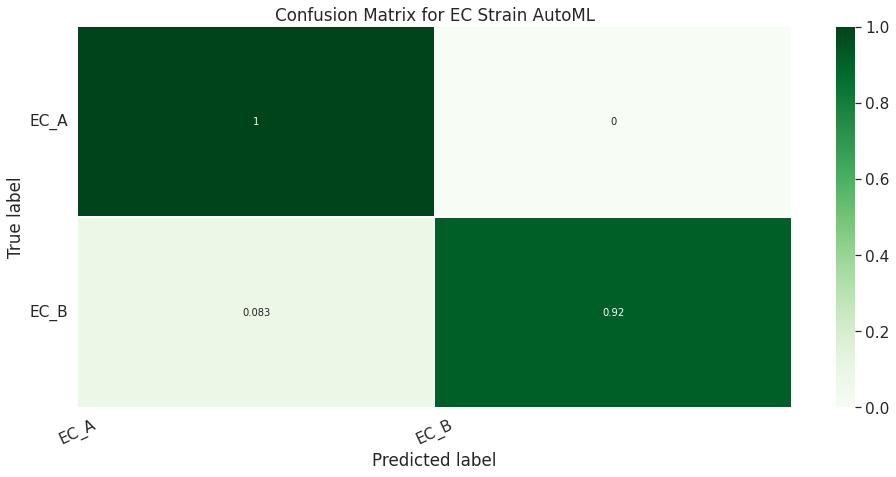

In [18]:
y_pred_strain=model.predict(ec_test_x)

matrix = confusion_matrix(ec_test_y, y_pred_strain)

matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['EC_A', 'EC_B']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for EC Strain AutoML')
plt.show()

### TPOT for PC

In [24]:
pca_time["Strain"] = pca_time["Strain"].replace(["PA.A", "PA.B"], [1,2])

pca_train = pca_time.sample(frac = 0.8)
pca_test = pca_time.drop(pca_train.index)

pca_train_x = pca_train.drop(["Strain"], axis=1)
pca_train_y = pca_train["Strain"]

pca_test_x = pca_test.drop(["Strain"], axis=1)
pca_test_y = pca_test["Strain"]

In [25]:
pca_time["Strain"].value_counts()

2    60
1    60
Name: Strain, dtype: int64

In [27]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
model.fit(pca_train_x, pca_train_y)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9274074074074076

Generation 2 - Current best internal CV score: 0.9274074074074076

Generation 3 - Current best internal CV score: 0.9377777777777777

Generation 4 - Current best internal CV score: 0.9407407407407408

Generation 5 - Current best internal CV score: 0.9407407407407408

Best pipeline: ExtraTreesClassifier(XGBClassifier(input_matrix, learning_rate=0.1, max_depth=3, min_child_weight=16, n_estimators=100, n_jobs=1, subsample=0.35000000000000003, verbosity=0), bootstrap=False, criterion=entropy, max_features=0.9000000000000001, min_samples_leaf=1, min_samples_split=15, n_estimators=100)


TPOTClassifier(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               generations=5, n_jobs=-1, population_size=50, random_state=1,
               scoring='accuracy', verbosity=2)

In [28]:
model.score(pca_test_x, pca_test_y)

0.9583333333333334

95.8% Accuracy

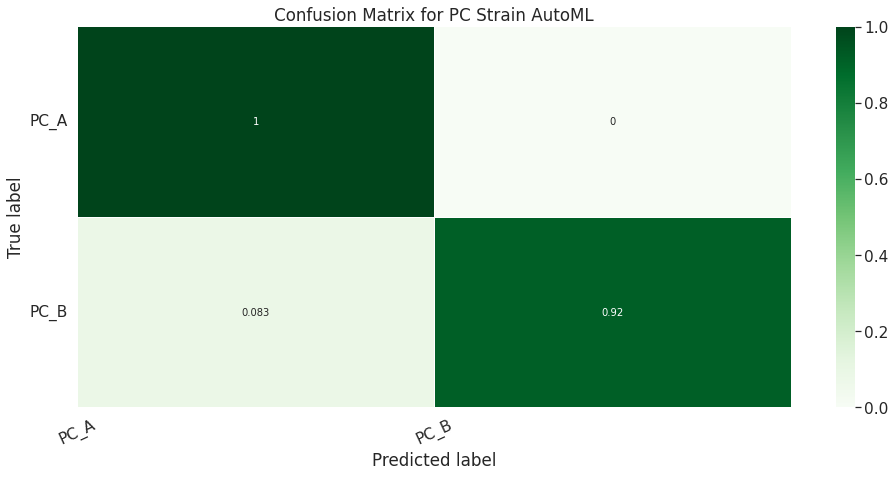

In [29]:
y_pred_strain=model.predict(pca_test_x)

matrix = confusion_matrix(pca_test_y, y_pred_strain)

matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['PC_A', 'PC_B']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for PC Strain AutoML')
plt.show()

## Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

First for EC

In [34]:
model = RandomForestClassifier()

In [35]:
model.fit(ec_train_x, ec_train_y)

RandomForestClassifier()

In [36]:
y_pred_strain=model.predict(ec_test_x)

In [40]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(_test_y, y_pred_strain))

Accuracy: 0.9166666666666666


91.6% Accuracy

PC Randm Forest Classifier

In [42]:
model = RandomForestClassifier()
model.fit(pca_train_x, pca_train_y)
y_pred_strain=model.predict(pca_test_x)
print("Accuracy:",accuracy_score(pca_test_y, y_pred_strain))

Accuracy: 0.875


87.5% Accuracy for predicting strain for Baseline 

### Random Forst using cross validation

In [52]:
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
}

EC Values

In [54]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(ec_train_x,ec_train_y.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [55]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [56]:
display(cv)

Best parameters are: {'max_depth': 4, 'n_estimators': 100}


0.855 + or -0.049 for the {'max_depth': 2, 'n_estimators': 5}
0.834 + or -0.066 for the {'max_depth': 2, 'n_estimators': 10}
0.877 + or -0.097 for the {'max_depth': 2, 'n_estimators': 50}
0.887 + or -0.08 for the {'max_depth': 2, 'n_estimators': 100}
0.887 + or -0.098 for the {'max_depth': 2, 'n_estimators': 250}
0.886 + or -0.075 for the {'max_depth': 4, 'n_estimators': 5}
0.928 + or -0.039 for the {'max_depth': 4, 'n_estimators': 10}
0.928 + or -0.067 for the {'max_depth': 4, 'n_estimators': 50}
0.938 + or -0.049 for the {'max_depth': 4, 'n_estimators': 100}
0.938 + or -0.049 for the {'max_depth': 4, 'n_estimators': 250}
0.938 + or -0.049 for the {'max_depth': 8, 'n_estimators': 5}
0.938 + or -0.049 for the {'max_depth': 8, 'n_estimators': 10}
0.938 + or -0.049 for the {'max_depth': 8, 'n_estimators': 50}
0.938 + or -0.049 for the {'max_depth': 8, 'n_estimators': 100}
0.938 + or -0.049 for the {'max_depth': 8, 'n_estimators

EC: {'max_depth': 4, 'n_estimators': 100}

### Perform again for PCA scores

In [57]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(pca_train_x,pca_train_y.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [58]:
display(cv)

Best parameters are: {'max_depth': 4, 'n_estimators': 100}


0.813 + or -0.108 for the {'max_depth': 2, 'n_estimators': 5}
0.865 + or -0.061 for the {'max_depth': 2, 'n_estimators': 10}
0.855 + or -0.083 for the {'max_depth': 2, 'n_estimators': 50}
0.855 + or -0.083 for the {'max_depth': 2, 'n_estimators': 100}
0.876 + or -0.069 for the {'max_depth': 2, 'n_estimators': 250}
0.897 + or -0.063 for the {'max_depth': 4, 'n_estimators': 5}
0.938 + or -0.038 for the {'max_depth': 4, 'n_estimators': 10}
0.938 + or -0.019 for the {'max_depth': 4, 'n_estimators': 50}
0.948 + or -0.032 for the {'max_depth': 4, 'n_estimators': 100}
0.938 + or -0.019 for the {'max_depth': 4, 'n_estimators': 250}
0.906 + or -0.061 for the {'max_depth': 8, 'n_estimators': 5}
0.948 + or -0.001 for the {'max_depth': 8, 'n_estimators': 10}
0.948 + or -0.032 for the {'max_depth': 8, 'n_estimators': 50}
0.948 + or -0.032 for the {'max_depth': 8, 'n_estimators': 100}
0.948 + or -0.032 for the {'max_depth': 8, 'n_estimator

PCA:{'max_depth': 8, 'n_estimators': 50}

### Best Random Forest Classifier values for Validation

### EC

In [97]:
model = RandomForestClassifier()
parameters = {
    "n_estimators":[8],
    "max_depth":[10]
}
cv = GridSearchCV(rfc,parameters,cv=5)

In [98]:
cv.fit(ec_train_x, ec_train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10], 'n_estimators': [8]})

In [99]:
y_pred_strain=cv.predict(ec_test_x)

In [111]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(ec_test_y, y_pred_strain))

Accuracy: 0.875


After Performing Random Forest Classifier Cross validation the best Accuracy is 95.83% for identifying strain

### PCA

In [93]:
model = RandomForestClassifier()
parameters = {
    "n_estimators":[50],
    "max_depth":[8]
}
cv = GridSearchCV(rfc,parameters,cv=5)

In [94]:
cv.fit(pca_train_x, pca_train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8], 'n_estimators': [50]})

In [95]:
y_pred_strain=cv.predict(pca_test_x)

In [96]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(pca_test_y, y_pred_strain))

Accuracy: 1.0


# Perform ML Model evaulation

Confusion Matrix, Classification Report!!!

Performance review will need to be done for AutoML models and for Random Classifier

For both PCA and for EC strains

Try get another AutoML feature done for comparison

In [112]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [122]:
#confusion_matrix(y_test, y_pred_test)
#print(classification_report(y_test, y_pred_test))

### Confusion Matrix for AutoML

In [123]:
from supervised.automl import AutoML
automl = AutoML(algorithms=["Decision Tree", "Linear", "Random Forest"],
                total_time_limit=5*60)
automl.fit(ec_train_x, ec_train_y)

y_predicted = automl.predict(ec_test_x)

predicted_strain = pd.DataFrame(y_predicted, columns=["PredictedStrain"])

2021-10-27 16:36:42,218 supervised.preprocessing.eda ERROR There was an issue when running EDA. could not convert string to float: 'EC_B'


AutoML directory: AutoML_13
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_DecisionTree logloss 0.062671 trained in 12.32 seconds
2_Linear logloss 0.711443 trained in 3.34 seconds
* Step default_algorithms will try to check up to 1 model
3_Default_RandomForest logloss 0.215058 trained in 5.24 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.062671 trained in 0.23 seconds
AutoML fit time: 27.58 seconds
AutoML best model: 1_DecisionTree


0     EC_A
1     EC_B
2     EC_A
3     EC_B
4     EC_B
5     EC_B
6     EC_B
7     EC_B
8     EC_B
9     EC_A
10    EC_A
11    EC_A
12    EC_A
13    EC_A
14    EC_A
15    EC_B
16    EC_B
17    EC_B
18    EC_A
19    EC_A
20    EC_B
21    EC_B
22    EC_A
23    EC_B
Name: PredictedStrain, dtype: object

In [125]:
confusion_matrix(ec_test_y, predicted_strain)

array([[11,  1],
       [ 0, 12]])

In [127]:
ec_time["Strain"].value_counts()

EC_A    60
EC_B    60
Name: Strain, dtype: int64

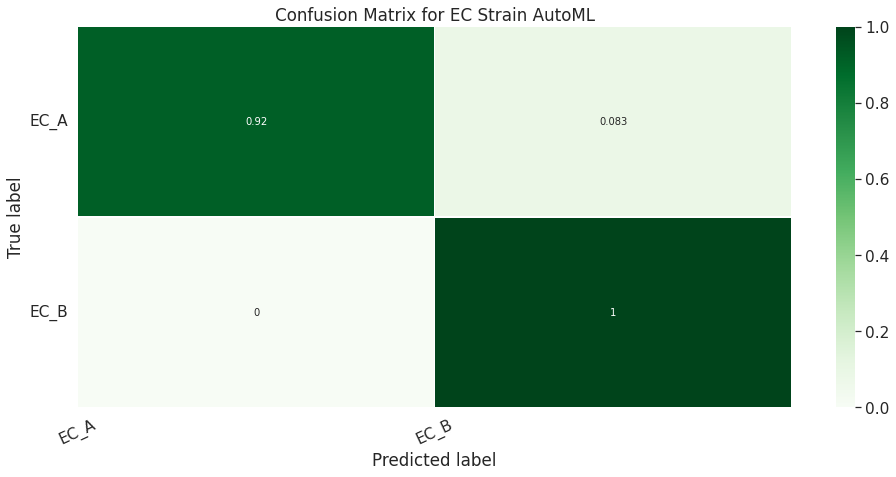

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix = confusion_matrix(ec_test_y, predicted_strain)

matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['EC_A', 'EC_B']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for EC Strain AutoML')
plt.show()

In [130]:
print(classification_report(ec_test_y, predicted_strain))

              precision    recall  f1-score   support

        EC_A       1.00      0.92      0.96        12
        EC_B       0.92      1.00      0.96        12

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



In [141]:
from supervised.automl import AutoML
automl = AutoML(algorithms=["Decision Tree", "Linear", "Random Forest"],
                total_time_limit=5*60)
automl.fit(pca_train_x, pca_train_y)

y_predicted = automl.predict(pca_test_x)

predicted_strain = pd.DataFrame(y_predicted, columns=["PredictedStrain"])

2021-10-27 16:50:05,682 supervised.preprocessing.eda ERROR There was an issue when running EDA. could not convert string to float: 'PA.B'


AutoML directory: AutoML_16
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_DecisionTree logloss 0.407512 trained in 3.84 seconds
2_Linear logloss 0.559297 trained in 2.56 seconds
* Step default_algorithms will try to check up to 1 model
3_Default_RandomForest logloss 0.524965 trained in 4.47 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.407512 trained in 0.16 seconds
AutoML fit time: 17.41 seconds
AutoML best model: 1_DecisionTree


In [132]:
pca_time["Strain"].value_counts()

PA.B    60
PA.A    60
Name: Strain, dtype: int64

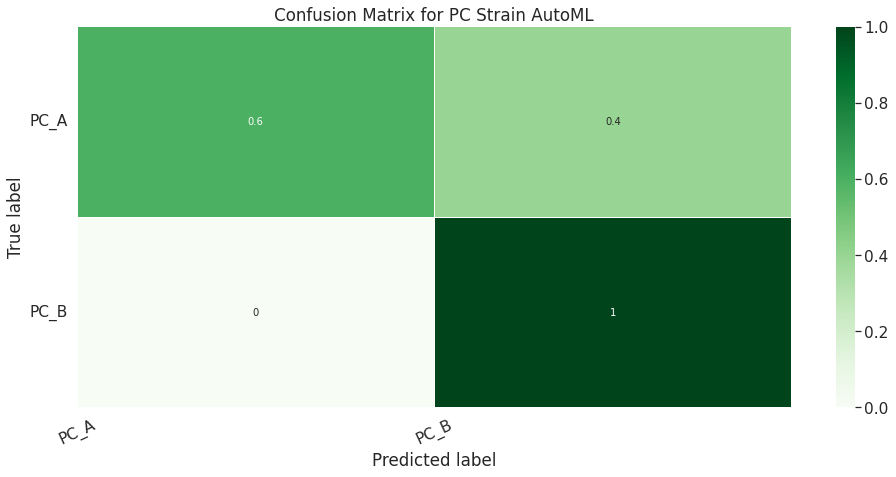

In [142]:
matrix = confusion_matrix(pca_test_y, predicted_strain)

matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['PC_A', 'PC_B']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for PC Strain AutoML')
plt.show()

In [143]:
print(classification_report(pca_test_y, predicted_strain))

              precision    recall  f1-score   support

        PA.A       1.00      0.60      0.75        10
        PA.B       0.78      1.00      0.88        14

    accuracy                           0.83        24
   macro avg       0.89      0.80      0.81        24
weighted avg       0.87      0.83      0.82        24



### Evaluation of Random Forest Classifier

EC

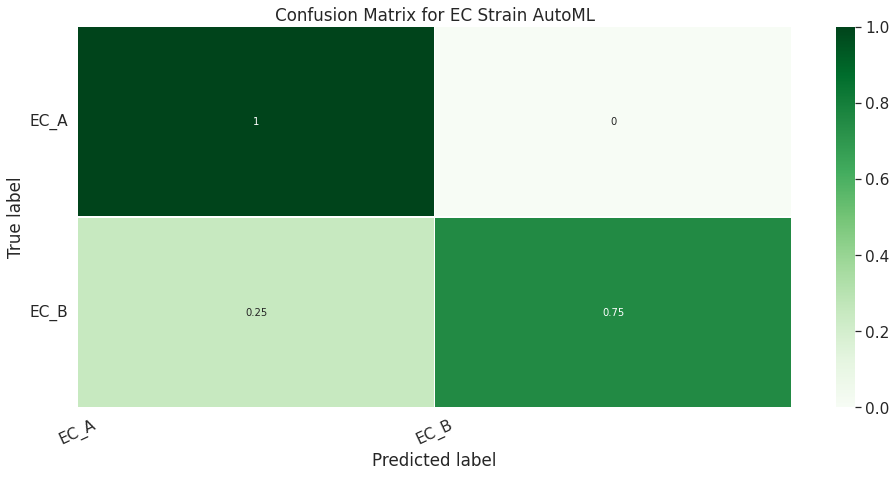

In [148]:
model = RandomForestClassifier()
model.fit(ec_train_x, ec_train_y)
y_pred_strain=model.predict(ec_test_x)

matrix = confusion_matrix(ec_test_y, y_pred_strain)

matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['EC_A', 'EC_B']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for EC Strain AutoML')
plt.show()

In [151]:
print(classification_report(ec_test_y, y_pred_strain))

              precision    recall  f1-score   support

        EC_A       0.80      1.00      0.89        12
        EC_B       1.00      0.75      0.86        12

    accuracy                           0.88        24
   macro avg       0.90      0.88      0.87        24
weighted avg       0.90      0.88      0.87        24



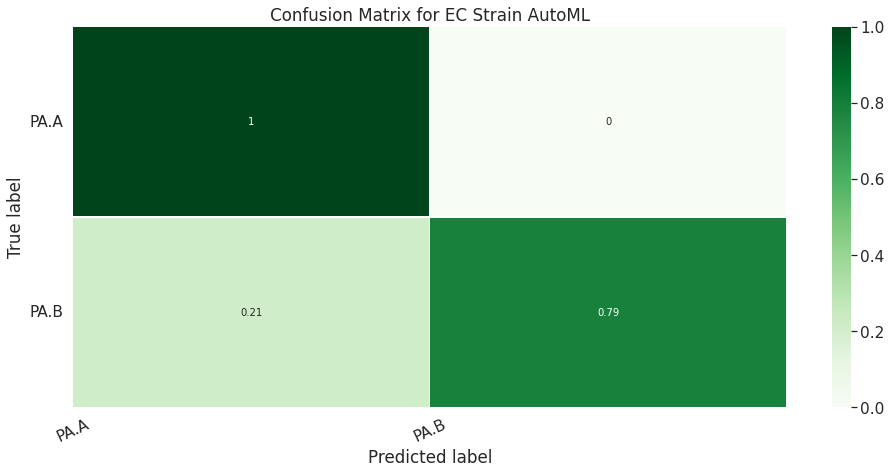

In [152]:
model = RandomForestClassifier()
model.fit(pca_train_x, pca_train_y)
y_pred_strain=model.predict(pca_test_x)

matrix = confusion_matrix(pca_test_y, y_pred_strain)

matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['PA.A', 'PA.B']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for EC Strain AutoML')
plt.show()

In [153]:
print(classification_report(pca_test_y, y_pred_strain))

              precision    recall  f1-score   support

        PA.A       0.77      1.00      0.87        10
        PA.B       1.00      0.79      0.88        14

    accuracy                           0.88        24
   macro avg       0.88      0.89      0.87        24
weighted avg       0.90      0.88      0.88        24



### Evaluation for Cross Validated Random Forest Classifiers

EC

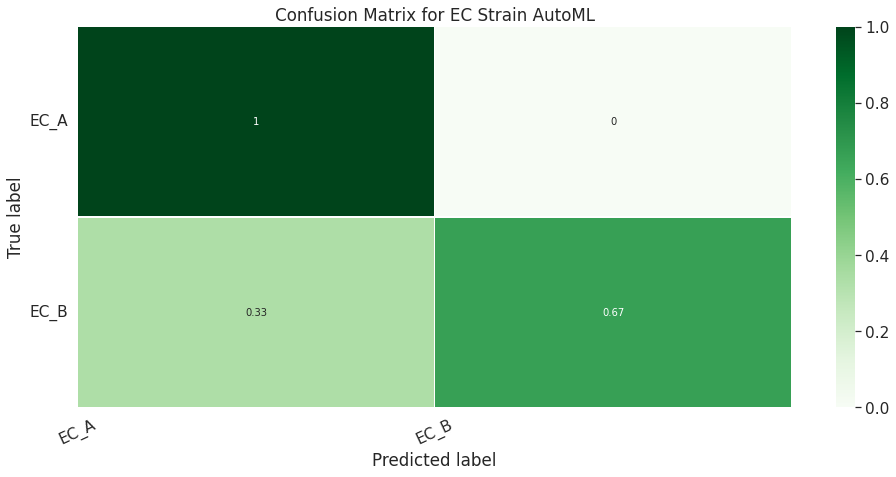

In [154]:
model = RandomForestClassifier()
parameters = {
    "n_estimators":[8],
    "max_depth":[10]
}
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(ec_train_x, ec_train_y)
y_pred_strain=cv.predict(ec_test_x)

matrix = confusion_matrix(ec_test_y, y_pred_strain)

matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['EC_A', 'EC_B']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for EC Strain AutoML')
plt.show()

In [155]:
print(classification_report(ec_test_y, y_pred_strain))

              precision    recall  f1-score   support

        EC_A       0.75      1.00      0.86        12
        EC_B       1.00      0.67      0.80        12

    accuracy                           0.83        24
   macro avg       0.88      0.83      0.83        24
weighted avg       0.88      0.83      0.83        24



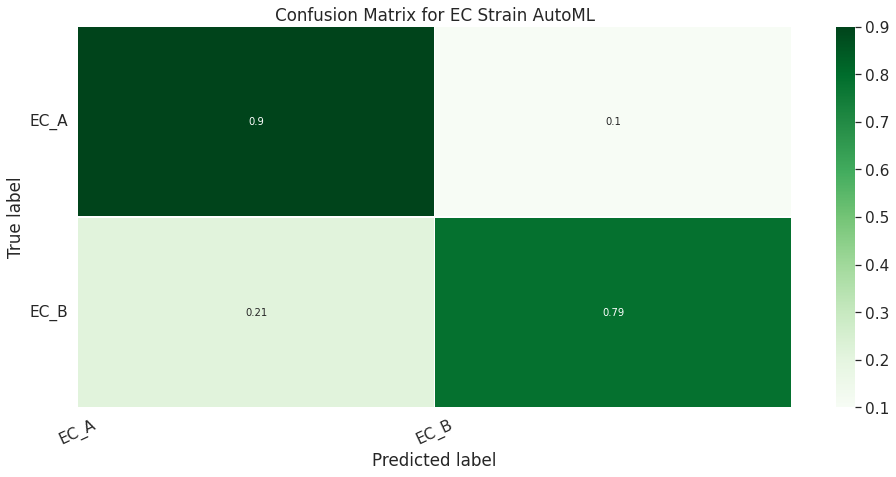

In [156]:
model = RandomForestClassifier()
parameters = {
    "n_estimators":[50],
    "max_depth":[8]
}
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(pca_train_x, pca_train_y)
y_pred_strain=cv.predict(pca_test_x)

matrix = confusion_matrix(pca_test_y, y_pred_strain)

matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['EC_A', 'EC_B']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for EC Strain AutoML')
plt.show()

In [157]:
print(classification_report(pca_test_y, y_pred_strain))

              precision    recall  f1-score   support

        PA.A       0.75      0.90      0.82        10
        PA.B       0.92      0.79      0.85        14

    accuracy                           0.83        24
   macro avg       0.83      0.84      0.83        24
weighted avg       0.85      0.83      0.83        24

